# Campo de coletores solares e sistema de destilação

Segundo Roca et. al. (2008), a escassez de água é um problema que afeta diferentes países, sendo classificado por González, Roca e Rodríguez (2014) como um dos principais problemas da atualidade. Um caminho indicado para mitigação deste problema é o uso da dessalinização de água salgada, proveniente dos oceanos, por exemplo. A destilação multi-efeitos$^{1}$ (MED, do inglês, *multi-effect distilation*) pode ser utilizada para este fim, cujo produto obtido é o destilado (água com baixo teor de sais).

A Figura 1 apresenta um fluxograma do processo de dessalinização. González, Roca e Rodríguez (2014) indicam que o destilado produzido é uma função da temperatura de aquecimento do primeiro efeito. Além disso, uma forma de prover esta temperatura é através da troca de calor com um fluido aquecido por um sistema de placas solares. 

$^1$ Cada efeito pode ser entendido como uma unidade para aquecimento da água.

Figura 1: fluxograma

![Placa](./esquema_planta_dessalinizacao.png)

**Equacionamento**:

$\rho\cdot c_p\cdot A_a \cdot \frac{\text{d} T_{out}(t)}{\text{d} t} = \beta\cdot I(t) - \frac{H}{L_{eq}\cdot 2} \cdot \left(T_{\text{out}}(t)+T_\text{in}(t) - 2 \cdot T_a(t)\right) - \frac{c_p}{L_{\text{eq}}} \cdot m_{\text{eq}}(t)\cdot\left(T_{\text{out}}(t)-T_{\text{in}}(t)\right)$

$\frac{\text{d} D}{\text{d} t} = K\cdot(T_\text{out}-60.0243) - (D-5.)$

**Variáveis**

- $\rho$ -> Densidade do fluido (kg/m$^3$)
- $c_p$  -> capacidade calorífica (kJ/kg)
- $A_a$  -> Área transversal (m$^2$)
- $\beta$ ->parâmetro do modelo de irradiação (m)
- $H$      -> coeficiente de perda de calor (J$\cdot$s$^{-1}\cdot$K$^{-1}$)
- $L_{\text{eq}}$ -> comprimento de tubo equivalente (m)
- $T_{out}$ -> temperatura de saída do sistema de placas ($^\circ$C)
- $D$ -> Destilado produzido (m$^3$)

O ponto de operação normal do sistema é dado pelas seguintes condições:

- $I_{\text{ss}}$ = 800 W m$^{-2}$
- $T_{\text{a}_\text{ss}}$  = 25 $^\circ$C
- $T_{\text{in}_\text{ss}}$ = 60 $^\circ$C
- $T_{\text{out}_\text{ss}}$ = 60,0243 $^\circ$C
- $m_{\text{eq}_\text{ss}}$ = 2,9 kg s$^{-1}$
- $D_{\text{ss}}$ = 5 m$^{3}$

**Referências** 

- GONZÁLEZ, R.; ROCA, L.; RODRÍGUEZ, F. Economic optimal control applied to a solar seawater desalination plant. Computers & Chemical Engineering, v. 71, p. 554–562, 2014

- ROCA, L.; BERENGUEL, M.; YEBRA, L.; ALARCÓN-PADILLA, D. C. Solar field control for desalination plants. Solar Energy, v. 82, n. 9, p. 772–786, 2008

In [1]:
# Importação de pacotes
import serial

from numpy import linspace, array, hstack

## Pacotes que permitem manipular como os gráficos aparecem neste notebook
from matplotlib.pyplot import figure, tight_layout
from IPython import display
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

In [2]:
# Gráficos

def grafico(Tout,D,Tin,Ta,meq,I,instanteTempo):
    
    fig = figure(figsize=(8,4))
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot([0, 0], [20, 65], 'k-', [1, 1], [20, 65], 'k-')
    ax.plot([0, 1],[float(Tout), float(Tout)],'b-')
    ax.set_ylabel('Tout')
    ax.set_ylim(20,65)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot([0, 0], [0, 10], 'k-',[1, 1], [0, 10], 'k-')
    ax.plot([0, 1], [float(D), float(D)], 'b-')
    ax.set_ylabel('D')
    ax.set_ylim(0,10)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True) 
    
    ax.text(1.2, 3, 'Tempo: {:.2f} s'.format(instanteTempo), fontsize=14, verticalalignment='top',)
    ax.text(1.2, 2, 'Tin: {:.2f} C | Ta: {:.2f} C'.format(float(Tin), float(Ta)), fontsize=14, verticalalignment='top',)
    ax.text(1.2, 1, 'meq: {:.2f} m$^3$/s | I: {:.2f} W/m$^2$'.format(float(meq), float(I)), fontsize=14, verticalalignment='top',)
    
    tight_layout()    
    
def grafico_tendencia(Tout,D,Tin,Ta,meq,I,namostra):
    
    tempo = linspace(0,(namostra-1)*Ts,namostra)

    fig = figure(figsize=(10,5))
    axes = fig.add_subplot(2,1,1)
    axes.plot(tempo,Tout,'.-')
    axes.set_ylabel('$Tout$/ C')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(2,1,2)
    axes.plot(tempo,D,'.-')
    axes.set_ylabel('$D$ / m3/s')
    axes.set_xlabel('tempo /s')

    fig = figure(figsize=(10,5))
    axes = fig.add_subplot(4,1,1)
    axes.plot(tempo,Tin,'.-')
    axes.set_ylabel('$Tin$/ m')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,2)
    axes.plot(tempo,Ta,'.-')
    axes.set_ylabel('$Ta$ / C')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,3)
    axes.plot(tempo,meq,'.-')
    axes.set_ylabel('$meq$ / m3/s')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,4)
    axes.plot(tempo,I,'.-')
    axes.set_ylabel('$I$ / W/m2')
    axes.set_xlabel('tempo /s')

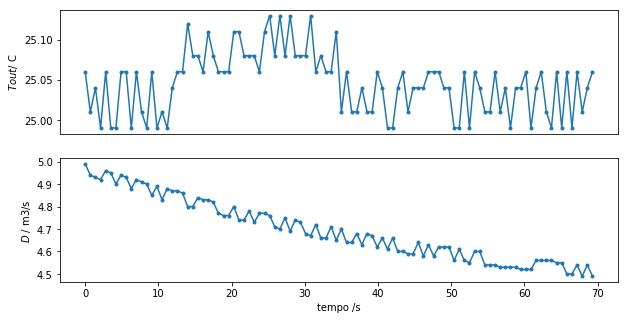

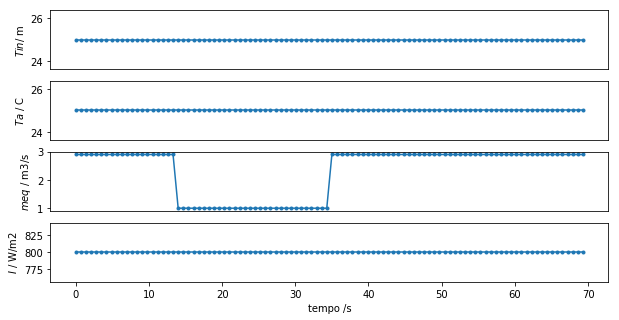

In [4]:
ser = serial.Serial('/dev/ttyACM0', 9600)  # Establish the connection on a specific port

nsim = 100 # Quantidade total de amostras

Ts = 0.7 # Período de amostragem [s]

# Condições iniciais

Tout0 = 25.
D0 = 5.

# Variáveis exógenas
Tin = [25.]*200
[Tin.append(1.) for it in range(20)]
[Tin.append(1.) for it in range(20)]

Ta = [25.]*200
[Ta.append(1.) for it in range(20)]
[Ta.append(1.) for it in range(20)]

meq = [2.9]*20
[meq.append(1.) for it in range(30)]
[meq.append(2.9) for it in range(50)]

I = [800.]*200
[I.append(20.) for it in range(20)]
[I.append(20.) for it in range(20)]

# Iniciando listas
Tout = []
D = []
Tin_ = []
Ta_ = []
meq_ = []
I_ = []

# Comunicação
x = ser.readline()
print(x)

#Escrevendo condicoes inicias
ser.write(bytearray('{:.2f};{:.2f}'.format(Tout0,D0),'ASCII'))

# Simulando...
for it in range(nsim):
    
    ser.write(bytearray('{:.1f};{:.2f};{:.2f};{:.2f};{:.2f};{:.2f}\n'.format(1,Tin[it],Ta[it],meq[it],I[it],Ts),'ASCII'))

    x = ser.readline().decode("utf-8")
    
    data = x.split('&')

    Tout.append(float(data[0]))
    D.append(float(data[1]))
    Tin_.append(float(data[2]))    
    Ta_.append(float(data[3]))
    meq_.append(float(data[4]))
    I_.append(float(data[5]))
        
#     # mostrando a figura
    #grafico(*data,it*Ts)
    grafico_tendencia(Tout,D,Tin_,Ta_,meq_,I_,it+1)
    display.clear_output(wait=True)
    show_inline_matplotlib_plots()
        
    
ser.close() # Fechando a conexão com o arduino através da porta serial